In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [5]:
# оставляем только нужные столбцы
data_2 = data[['sepal length (cm)', 'sepal width (cm)']]
data_2.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2, data_class, test_size=0.25)

In [7]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем модель на тренировочных данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [20]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)
y_pred

array([1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0,
       2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,2,2
2,1,1
3,2,1
4,2,2
5,1,1
6,1,1
7,2,2
8,1,1
9,1,2


In [12]:
# расчет точности прогноза
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

In [14]:
# коэффициенты дискриминантных линий
lda.coef_

array([[-5.74499046,  8.33332293],
       [ 1.95080896, -4.35829487],
       [ 4.28353965, -4.55383969]])

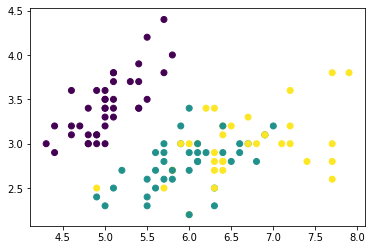

In [16]:
# Визуализация тренировочных данных
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c = y_train)

In [22]:
# центроиды в предсказанных значениях
lda.means_

array([[5.02820513, 3.43333333],
       [5.96842105, 2.77368421],
       [6.60571429, 2.97714286]])

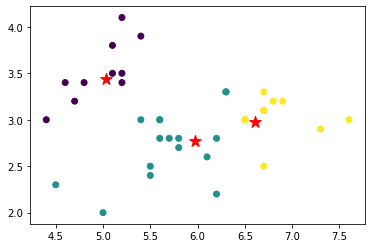

In [27]:
# Визуализируйте предсказания для тестовой выборки и центры классов
# сами предсказанные точки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = y_pred)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [28]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
data_2.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [33]:
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


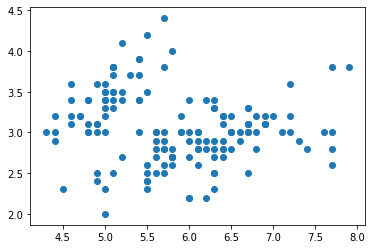

In [32]:
plt.scatter(data_2['sepal length (cm)'], data_2['sepal width (cm)'])

In [34]:
# Приведем данные к одному масштабу
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_scaled = scaler.fit_transform(data_2)

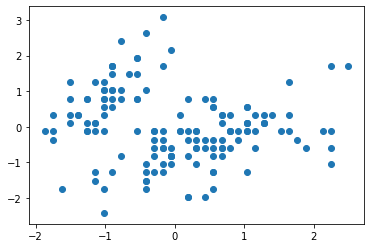

In [40]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [42]:
from sklearn.cluster import KMeans

In [50]:
# определим для 2 кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

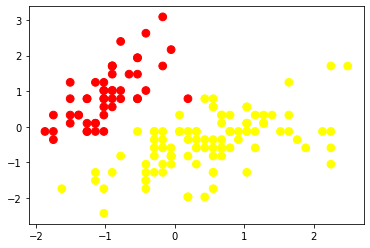

In [51]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [52]:
# определим для 3 кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

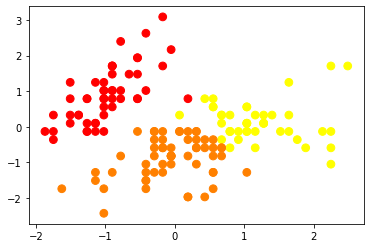

In [53]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [54]:
# определим для 4 кластеров
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 3, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3])

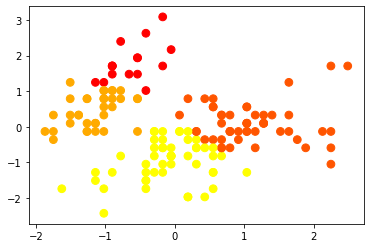

In [55]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [59]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

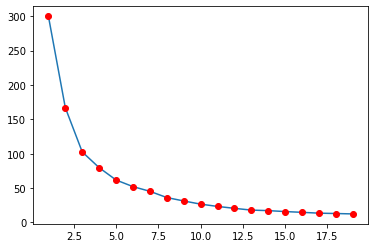

In [57]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Как видно на графике локтя оптимальным является 2 либо 3 кластера, но при делении на 3 кластера распределение равномерней.
Тогда в каждый из 3-х кластеров входит примерно одинаковое количество точек.